In [1]:
# auto-reload changed source files when they are imported
%reload_ext autoreload
%autoreload 2

# add top repo dir to path so that src can be imported
import sys
sys.path.append("..")

%matplotlib inline

# Imports

In [20]:
from src.data import load_raman_spectra, load_crystal_structures
import glob
import numpy as np
from collections import Counter
import torch_geometric as pyg

# Raman

In [3]:
fp = "../data/raw/raman/excellent_unoriented/Abelsonite__R070007__Raman__532__0__unoriented__Raman_Data_Processed__27040.txt"
model_wavenumber_values = np.arange(1000.0,500.0,-10.0)
load_raman_spectra.load_single_raman_spectrum(model_wavenumber_values,fp)

('Abelsonite',
 532,
 array([0.69842711, 0.69896184, 0.69858846, 0.74643274, 0.72949345,
        0.78793888, 0.60722956, 0.29508071, 0.29044808, 0.28043752,
        0.46705985, 0.13422788, 0.00596951, 0.02407432, 0.02073675,
        0.1360224 , 0.14793432, 0.58032796, 0.39205618, 0.10990508,
        0.40412146, 0.2598797 , 0.38066561, 0.14850761, 1.        ,
        0.53162272, 0.00499501, 0.11940523, 0.56775302, 0.51175452,
        0.39550698, 0.05001148, 0.04802603, 0.00930858, 0.00532165,
        0.26057371, 0.09667703, 0.02044032, 0.10936421, 0.12025251,
        0.05948381, 0.08570629, 0.06823977, 0.02057031, 0.04822269,
        0.11819594, 0.05236448, 0.05744564, 0.10953358, 0.19399357]))

In [7]:
model_wavenumber_values = np.arange(1000.0,500.0,-10.0)
chosen_wavelength = 514
raman_file_paths, raman_mineral_names, raman_spectra, raman_wavelengths = load_raman_spectra.load_raman_data(model_wavenumber_values,wavelength=chosen_wavelength)

In [8]:
print(len(raman_mineral_names))
print("wavelengths:",dict(Counter(raman_wavelengths))) # So, probably just go for 514 nm wavelength
print("minerals:",dict(Counter(raman_mineral_names)))
# consider removing minerals with fewer than 1-2 spectra

4130
wavelengths: {514: 4130}
minerals: {'Actinolite': 61, 'Adamite': 20, 'Aegirine': 26, 'Aenigmatite': 15, 'Afmite': 1, 'Akermanite': 12, 'Albite': 70, 'Almandine': 25, 'Amblygonite': 19, 'Amesite': 6, 'Analcime': 17, 'Anatase': 6, 'Andalusite': 56, 'Andradite': 26, 'Anglesite': 24, 'Anhydrite': 20, 'Ankerite': 14, 'Annite': 26, 'Anorthite': 38, 'Aragonite': 19, 'Arfvedsonite': 12, 'Arsenopyrite': 12, 'Astrophyllite': 34, 'Atacamite': 9, 'Augelite': 14, 'Augite': 33, 'AxiniteFe': 104, 'Azurite': 24, 'Baddeleyite': 24, 'Barrerite': 10, 'Barysilite': 7, 'Baryte': 86, 'Bertrandite': 9, 'Beryl': 66, 'Bikitaite': 19, 'Bobdownsite': 7, 'Boleite': 4, 'Braunite': 21, 'Brazilianite': 38, 'Brookite': 19, 'Brucite': 7, 'Bustamite': 20, 'Calcite': 40, 'Cancrinite': 7, 'Carrollite': 6, 'Cassiterite': 25, 'Catapleiite': 35, 'Celestine': 20, 'Cerussite': 56, 'ChabaziteCa': 14, 'Chalcopyrite': 4, 'Chenevixite': 4, 'Chloritoid': 25, 'Chlormayenite': 1, 'Chondrodite': 13, 'Chrysoberyl': 9, 'Clinochlor

# Crystal structures

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 0.93 0.95 1.0453884981633847
1 Li 3 6.94 0.98 0.05 1.0453884981633847
2 Al 13 26.982 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 1.83 0.09 0.4374208670562803
4 As 33 74.922 2.18 1.0 0.3979424494519229
5 O 8 15.999 3.44 1.0 0.7540377762432269
6 O 8 15.999 3.44 1.0 0.6616582790490306
7 F 9 18.998 3.98 0.73 0.5676996451506598
8 O 8 15.999 3.44 0.27 0.5676996451506598


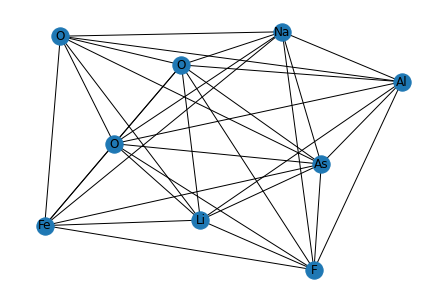

In [13]:
fp = "../data/raw/CIFs/Acuminite0010999.cif"
fp = "../data/raw/CIFs/Durangite0019593.cif"
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,verbose=True)

mineral name: Durangite
cell parameters: [  6.5789   8.5071   7.0212  90.     115.447   90.    ]

i el atomic_number atomic_weight electronegativity xyz occ Biso
0 Na 11 22.99 0.93 0.95 1.0453884981633847
1 Li 3 6.94 0.98 0.05 1.0453884981633847
2 Al 13 26.982 1.61 0.91 0.4374208670562803
3 Fe 26 55.845 1.83 0.09 0.4374208670562803
4 As 33 74.922 2.18 1.0 0.3979424494519229
5 O 8 15.999 3.44 1.0 0.7540377762432269
6 O 8 15.999 3.44 1.0 0.6616582790490306
7 F 9 18.998 3.98 0.73 0.5676996451506598
8 O 8 15.999 3.44 0.27 0.5676996451506598


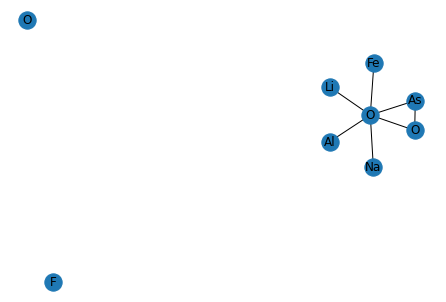

In [14]:
mineral_name, G = load_crystal_structures.load_single_crystal_structure(fp,max_distance_for_edge=3.0,verbose=True)

In [15]:
cif_file_paths, cif_mineral_names, cif_graphs = load_crystal_structures.load_cif_data()
print(cif_mineral_names)

['Acuminite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Albite', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Beryl', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Calcite', 'Durangite']


# Combine

In [28]:
minerals_for_dataset = ["Albite", "Beryl", "Calcite"]
dataset_list = []
for mineral in minerals_for_dataset:
    cur_mineral_raman_indices = [i for i, x in enumerate(raman_mineral_names) if x == mineral]
    cur_mineral_graph_indices = [i for i, x in enumerate(cif_mineral_names) if x == mineral]
    for i_raman, i_graph in zip(cur_mineral_raman_indices,cur_mineral_graph_indices):
        dataset_list.append((pyg.utils.convert.from_networkx(cif_graphs[i_graph]),raman_spectra[i_raman]))

In [30]:
dataset_list[0][0]

Data(edge_index=[2, 328], element=[19], occ=[19], Biso=[19], atomic_number=[19], atomic_weight=[19], electronegativity=[19], dist=[328], num_nodes=19)